In [272]:
import pandas as pd
import numpy as np

In [273]:
col_name = ["ProblemId","C","C++","Go","Java","Javascript","Python","Python3"]
df = pd.read_csv('../data/processed/success_score.csv')
df.rename(columns = {'Unnamed: 0':'problemId'}, inplace = True)
df

,problemId,C,C++,Go,Java,Javascript,Python,Python3
0,5b5c8cd7276e2200208fed62,0.113084,0.062896,0.018709,0.106951,0.136431,0.058652,0.331156
1,5b645f711b2cd40020b6c771,0.097432,0.091584,0.014505,0.072974,0.105770,0.410028,0.272099
2,5b649819c0b1b80020eb30e1,0.228293,0.054779,0.027504,0.076853,0.200560,0.086221,0.287669
3,5b64600d1b2cd40020b6c772,0.154672,0.059644,0.000611,0.076124,0.004455,0.001915,0.260564
4,5b6c3ec18cab100020e963b7,0.111443,0.072951,0.019287,0.114502,0.140643,0.060463,0.387390
...,...,...,...,...,...,...,...,...
204,63a2b5b7a198a20018e909d9,0.040642,0.037719,0.011408,0.105617,0.083191,0.035764,0.372475
205,63a2b688a198a20018e909db,0.113426,0.060145,0.031839,0.107438,0.232172,0.099812,0.238944
206,63a2b83da198a20018e909df,0.102083,0.066264,0.028655,0.105352,0.208955,0.089831,0.203811
207,63a2b900a198a20018e909e1,0.048611,0.190476,0.013645,0.076741,0.099502,0.042776,0.343945


In [274]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [275]:
X = df.drop('problemId', axis=1)
Y = df['problemId']

In [276]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.4, random_state=4)

In [277]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((125, 7), (84, 7), (125,), (84,))

In [278]:
knn = KNN(n_neighbors=3,algorithm='ball_tree')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [279]:
y_test_sum = []

for prob in y_test:
    y_test_sum.append(sum(df[df['problemId'] == prob].to_numpy()[0,1:]))

In [280]:
y_pred_sum = []

for prob in y_pred:
    y_pred_sum.append(sum(df[df['problemId'] == prob].to_numpy()[0,1:]))

In [281]:
len(y_pred_sum),len(y_test_sum)

(84, 84)

In [282]:
from sklearn.metrics import r2_score

r2_score(y_test_sum,y_pred_sum)

0.7200745586947008

In [283]:
from sklearn.metrics import r2_score
def Evaluate(x_train,x_test,y_train,y_test):
    res = []

    for i in range(1,26):
        knn = KNN(n_neighbors=i,algorithm='ball_tree')
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)

        y_test_sum = []

        for prob in y_test:
            y_test_sum.append(sum(df[df['problemId'] == prob].to_numpy()[0,1:]))


        y_pred_sum = []

        for prob in y_pred:
            y_pred_sum.append(sum(df[df['problemId'] == prob].to_numpy()[0,1:]))


        res.append(r2_score(y_test_sum,y_pred_sum))

    return res

In [284]:
r = Evaluate(x_train,x_test,y_train,y_test)

c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature

In [285]:
max(r)

0.8145151792886379

In [286]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)


In [287]:
y_test_sum = []

for prob in y_test:
    y_test_sum.append(sum(df[df['problemId'] == prob].to_numpy()[0,1:]))

In [288]:
len(y_test_sum),len(y_pred)

(84, 84)

In [289]:
y_pred_sum = []

for prob in y_pred:
    y_pred_sum.append(sum(df[df['problemId'] == prob].to_numpy()[0,1:]))


In [290]:
r2_score(y_test_sum,y_pred_sum)

0.8145151792886379

In [291]:
# using algorithm='kd_tree' instead of 'ball_tree' gives better results

from sklearn.neighbors import KNeighborsClassifier as KNN

kn = KNN(n_neighbors=3,algorithm='kd_tree')
kn.fit(x_train, y_train)
y_pred = kn.predict(x_test)

c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [292]:
def calytest_sum(y_test):
    y_test_sum = []

    for prob in y_test:
        y_test_sum.append(sum(df[df['problemId'] == prob].to_numpy()[0,1:]))
    return y_test_sum

In [293]:
def calypred_sum(y_pred):
    y_pred_sum = []

    for prob in y_pred:
        y_pred_sum.append(sum(df[df['problemId'] == prob].to_numpy()[0,1:]))
    return y_pred_sum

In [294]:
yknn,ypredknn = calytest_sum(y_test),calypred_sum(y_pred)

In [295]:
r2_score(yknn,ypredknn)

0.7200745586947008

In [296]:
# classification algorithms
# 1. KNN
# 2. Naive Bayes
# 3. Decision Tree
# 4. Random Forest
# 5. SVM
# 6. Logistic Regression
# 7. Neural Network
# 8. XGBoost
# 9. AdaBoost
# 10. Gradient Boosting 
# 11. Bagging

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt
from collections import defaultdict
eval = defaultdict(dict)

## KNN

In [297]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=1,algorithm='ball_tree')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [298]:
y_pred_knn_sum = calypred_sum(y_pred)
y_test_knn_sum = calytest_sum(y_test)

In [299]:
r2_score(y_test_knn_sum,y_pred_knn_sum),mean_squared_error(y_test_knn_sum,y_pred_knn_sum),mean_absolute_error(y_test_knn_sum,y_pred_knn_sum), sqrt(mean_squared_error(y_test_knn_sum,y_pred_knn_sum))

(0.8145151792886379,
 0.015343077078923462,
 0.07383761320294485,
 0.12386717514710449)

In [300]:
eval['KNN'] = {'r2_score':r2_score(y_test_knn_sum,y_pred_knn_sum),'mean_squared_error':mean_squared_error(y_test_knn_sum,y_pred_knn_sum),'mean_absolute_error':mean_absolute_error(y_test_knn_sum,y_pred_knn_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_knn_sum,y_pred_knn_sum))}

## Naive Bayers

In [301]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [302]:
y_pred_gnb_sum = calypred_sum(y_pred)
y_test_gnb_sum = calytest_sum(y_test)

In [303]:
r2_score(y_test_gnb_sum,y_pred_gnb_sum),mean_squared_error(y_test_gnb_sum,y_pred_gnb_sum),mean_absolute_error(y_test_gnb_sum,y_pred_gnb_sum), sqrt(mean_squared_error(y_test_gnb_sum,y_pred_gnb_sum))

(0.8145151792886379,
 0.015343077078923462,
 0.07383761320294485,
 0.12386717514710449)

In [304]:
eval['Naive Bayes'] = {'r2_score':r2_score(y_test_gnb_sum,y_pred_gnb_sum),'mean_squared_error':mean_squared_error(y_test_gnb_sum,y_pred_gnb_sum),'mean_absolute_error':mean_absolute_error(y_test_gnb_sum,y_pred_gnb_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_gnb_sum,y_pred_gnb_sum))}

## Decision Tree

In [305]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [306]:
y_pred_dt_sum = calypred_sum(y_pred_dt)
y_test_dt_sum = calytest_sum(y_test)

In [307]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test_dt_sum,y_pred_dt_sum) , mean_squared_error(y_test_dt_sum,y_pred_dt_sum), mean_absolute_error(y_test_dt_sum,y_pred_dt_sum), sqrt(mean_squared_error(y_test_dt_sum,y_pred_dt_sum))

(-0.6273841469229255,
 0.13461522246131183,
 0.2283397929901205,
 0.3668994718738524)

In [308]:
eval['Decision Tree'] = {'r2_score':r2_score(y_test_dt_sum,y_pred_dt_sum),'mean_squared_error':mean_squared_error(y_test_dt_sum,y_pred_dt_sum),'mean_absolute_error':mean_absolute_error(y_test_dt_sum,y_pred_dt_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_dt_sum,y_pred_dt_sum))}

## Random Forest

In [309]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [310]:
y_pred_rf_sum = calypred_sum(y_pred_rf)
y_test_rf_sum = calytest_sum(y_test)

In [311]:
r2_score(y_test_rf_sum,y_pred_rf_sum) , mean_squared_error(y_test_rf_sum,y_pred_rf_sum) , mean_absolute_error(y_test_rf_sum,y_pred_rf_sum) , sqrt(mean_squared_error(y_test_rf_sum,y_pred_rf_sum))

(0.528552618402435,
 0.03899754970119228,
 0.10853409311244282,
 0.19747797269870956)

In [312]:
eval['Random Forest'] = {'r2_score':r2_score(y_test_rf_sum,y_pred_rf_sum),'mean_squared_error':mean_squared_error(y_test_rf_sum,y_pred_rf_sum),'mean_absolute_error':mean_absolute_error(y_test_rf_sum,y_pred_rf_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_rf_sum,y_pred_rf_sum))}

## SVM

In [313]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [314]:
y_pred_svm_sum = calypred_sum(y_pred_svm)
y_test_svm_sum = calytest_sum(y_test)

In [315]:
r2_score(y_test_svm_sum,y_pred_svm_sum) , mean_squared_error(y_test_svm_sum,y_pred_svm_sum) , mean_absolute_error(y_test_svm_sum,y_pred_svm_sum), sqrt(mean_squared_error(y_test_svm_sum,y_pred_svm_sum))

(0.8145151792886379,
 0.015343077078923462,
 0.07383761320294485,
 0.12386717514710449)

In [316]:
eval['SVM'] = {'r2_score':r2_score(y_test_svm_sum,y_pred_svm_sum),'mean_squared_error':mean_squared_error(y_test_svm_sum,y_pred_svm_sum),'mean_absolute_error':mean_absolute_error(y_test_svm_sum,y_pred_svm_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_svm_sum,y_pred_svm_sum))}

## Logistic Regression

In [317]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [318]:
y_pred_lr_sum = calypred_sum(y_pred_lr)
y_test_lr_sum = calytest_sum(y_test)

In [319]:
r2_score(y_test_lr_sum,y_pred_lr_sum) , mean_squared_error(y_test_lr_sum,y_pred_lr_sum) , mean_absolute_error(y_test_lr_sum,y_pred_lr_sum) , sqrt(mean_squared_error(y_test_lr_sum,y_pred_lr_sum))

(-3.107577756101474,
 0.3397737986204703,
 0.5274175172508873,
 0.5829011911297405)

In [320]:
eval['Logistic Regression'] = {'r2_score':r2_score(y_test_lr_sum,y_pred_lr_sum),'mean_squared_error':mean_squared_error(y_test_lr_sum,y_pred_lr_sum),'mean_absolute_error':mean_absolute_error(y_test_lr_sum,y_pred_lr_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_lr_sum,y_pred_lr_sum))}

## Neural Network

In [321]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(x_train, y_train)
y_pred_nn = nn.predict(x_test)

c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [322]:
y_pred_nn_sum = calypred_sum(y_pred_nn)
y_test_nn_sum = calytest_sum(y_test)

In [323]:
r2_score(y_test_nn_sum,y_pred_nn_sum) , mean_squared_error(y_test_nn_sum,y_pred_nn_sum) , mean_absolute_error(y_test_nn_sum,y_pred_nn_sum) , sqrt(mean_squared_error(y_test_nn_sum,y_pred_nn_sum))

(0.5675306413409503,
 0.035773335406803636,
 0.12116328774280254,
 0.18913840278167635)

In [324]:
eval['Neural Network'] = {'r2_score':r2_score(y_test_nn_sum,y_pred_nn_sum),'mean_squared_error':mean_squared_error(y_test_nn_sum,y_pred_nn_sum),'mean_absolute_error':mean_absolute_error(y_test_nn_sum,y_pred_nn_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_nn_sum,y_pred_nn_sum))}

## XGBoost

In [325]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [326]:
y_pred_xgb_sum = calypred_sum(y_pred_xgb)
y_test_xgb_sum = calytest_sum(y_test)

In [327]:
r2_score(y_test_xgb_sum,y_pred_xgb_sum) , mean_squared_error(y_test_xgb_sum,y_pred_xgb_sum) , mean_absolute_error(y_test_xgb_sum,y_pred_xgb_sum) , sqrt(mean_squared_error(y_test_xgb_sum,y_pred_xgb_sum))

(-0.0331123648746543,
 0.08545778886201731,
 0.20364003615027199,
 0.29233164191037775)

In [328]:
eval['XGBoost'] = {'r2_score':r2_score(y_test_xgb_sum,y_pred_xgb_sum),'mean_squared_error':mean_squared_error(y_test_xgb_sum,y_pred_xgb_sum),'mean_absolute_error':mean_absolute_error(y_test_xgb_sum,y_pred_xgb_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_xgb_sum,y_pred_xgb_sum))}

## AdaBoost

In [329]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)

c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [330]:
y_pred_ada_sum = calypred_sum(y_pred_ada)
y_test_ada_sum = calytest_sum(y_test)

In [331]:
r2_score(y_test_ada_sum,y_pred_ada_sum) , mean_squared_error(y_test_ada_sum,y_pred_ada_sum), mean_absolute_error(y_test_ada_sum,y_pred_ada_sum) , sqrt(mean_squared_error(y_test_ada_sum,y_pred_ada_sum))

(0.42838512523672945,
 0.04728328199211399,
 0.1710928597959663,
 0.21744719357148298)

In [332]:
eval['adaBoost'] = {'r2_score':r2_score(y_test_ada_sum,y_pred_ada_sum),'mean_squared_error':mean_squared_error(y_test_ada_sum,y_pred_ada_sum),'mean_absolute_error':mean_absolute_error(y_test_ada_sum,y_pred_ada_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_ada_sum,y_pred_ada_sum))}

## Gradient Boosting

In [333]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

In [334]:
y_pred_gb_sum = calypred_sum(y_pred_gb)
y_test_gb_sum = calytest_sum(y_test)

In [335]:
r2_score(y_test_gb_sum,y_pred_gb_sum) , mean_squared_error(y_test_gb_sum,y_pred_gb_sum) , mean_absolute_error(y_test_gb_sum,y_pred_gb_sum) , sqrt(mean_squared_error(y_test_gb_sum,y_pred_gb_sum))

(0.47643310274520234,
 0.04330881216988492,
 0.1276680223388032,
 0.2081076936825857)

In [336]:
eval['Gradient Boosting'] = {'r2_score':r2_score(y_test_gb_sum,y_pred_gb_sum),'mean_squared_error':mean_squared_error(y_test_gb_sum,y_pred_gb_sum),'mean_absolute_error':mean_absolute_error(y_test_gb_sum,y_pred_gb_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_gb_sum,y_pred_gb_sum))}

## Bagging

In [337]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()
bag.fit(x_train, y_train)
y_pred_bag = bag.predict(x_test)

In [338]:
y_pred_bag_sum = calypred_sum(y_pred_bag)
y_test_bag_sum = calytest_sum(y_test)

In [339]:
r2_score(y_test_bag_sum,y_pred_bag_sum) , mean_squared_error(y_test_bag_sum,y_pred_bag_sum) , mean_absolute_error(y_test_bag_sum,y_pred_bag_sum) , sqrt(mean_squared_error(y_test_bag_sum,y_pred_bag_sum))

(0.3568462834310199,
 0.05320088732365732,
 0.13103104421091447,
 0.23065317540336902)

In [340]:
eval['Bagging'] = {'r2_score':r2_score(y_test_bag_sum,y_pred_bag_sum),'mean_squared_error':mean_squared_error(y_test_bag_sum,y_pred_bag_sum),'mean_absolute_error':mean_absolute_error(y_test_bag_sum,y_pred_bag_sum),'root_mean_squared_error':sqrt(mean_squared_error(y_test_bag_sum,y_pred_bag_sum))}

In [341]:
len(eval)

11

In [342]:
eval

defaultdict(dict,
            {'KNN': {'r2_score': 0.8145151792886379,
              'mean_squared_error': 0.015343077078923462,
              'mean_absolute_error': 0.07383761320294485,
              'root_mean_squared_error': 0.12386717514710449},
             'Naive Bayes': {'r2_score': 0.8145151792886379,
              'mean_squared_error': 0.015343077078923462,
              'mean_absolute_error': 0.07383761320294485,
              'root_mean_squared_error': 0.12386717514710449},
             'Decision Tree': {'r2_score': -0.6273841469229255,
              'mean_squared_error': 0.13461522246131183,
              'mean_absolute_error': 0.2283397929901205,
              'root_mean_squared_error': 0.3668994718738524},
             'Random Forest': {'r2_score': 0.528552618402435,
              'mean_squared_error': 0.03899754970119228,
              'mean_absolute_error': 0.10853409311244282,
              'root_mean_squared_error': 0.19747797269870956},
             'SVM': {'r2_score

## Ploting Graphs

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

%matplotlib inline

In [365]:
evaldf = pd.DataFrame(eval)
evaldf

,KNN,Naive Bayes,Decision Tree,Random Forest,SVM,Logistic Regression,Neural Network,XGBoost,adaBoost,Gradient Boosting,Bagging
R2 Score,0.814515,0.814515,-0.627384,0.528553,0.814515,-3.107578,0.567531,-0.033112,0.428385,0.476433,0.356846
Mean Squared Error,0.015343,0.015343,0.134615,0.038998,0.015343,0.339774,0.035773,0.085458,0.047283,0.043309,0.053201
Mean Absolute Error,0.073838,0.073838,0.228340,0.108534,0.073838,0.527418,0.121163,0.203640,0.171093,0.127668,0.131031
Root Mean Squared Error,0.123867,0.123867,0.366899,0.197478,0.123867,0.582901,0.189138,0.292332,0.217447,0.208108,0.230653


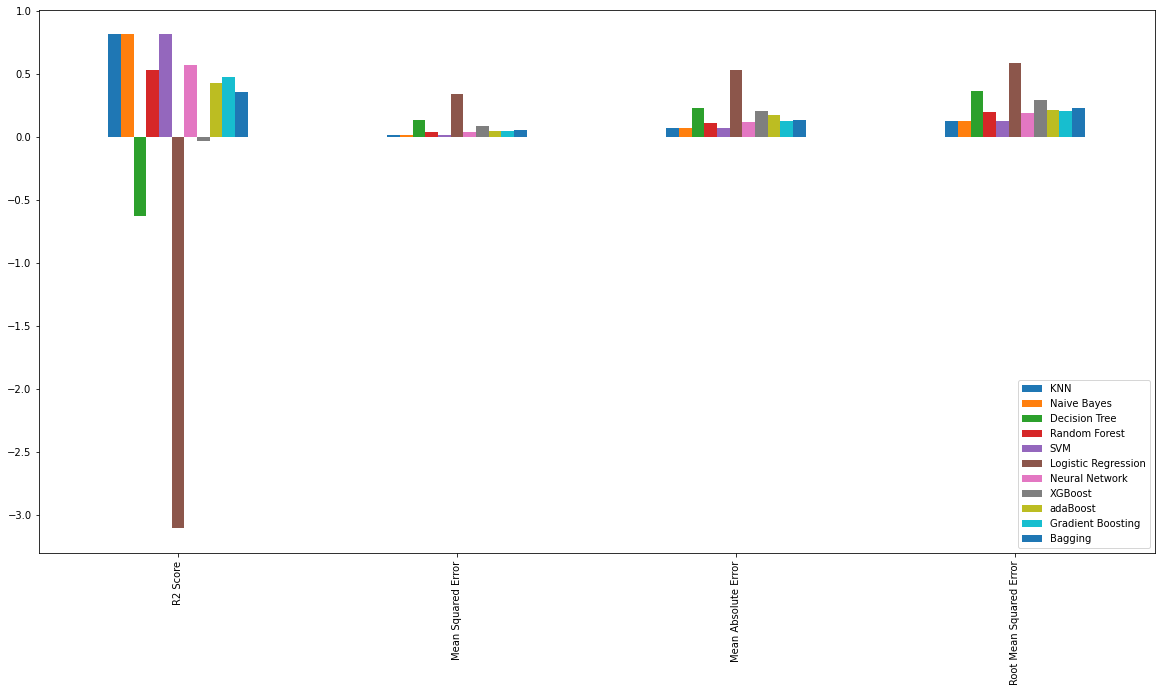

In [366]:
# ploting the histogram
evaldf.plot(kind='bar',figsize=(20,10))
plt.show()

In [367]:
evaldf

,KNN,Naive Bayes,Decision Tree,Random Forest,SVM,Logistic Regression,Neural Network,XGBoost,adaBoost,Gradient Boosting,Bagging
R2 Score,0.814515,0.814515,-0.627384,0.528553,0.814515,-3.107578,0.567531,-0.033112,0.428385,0.476433,0.356846
Mean Squared Error,0.015343,0.015343,0.134615,0.038998,0.015343,0.339774,0.035773,0.085458,0.047283,0.043309,0.053201
Mean Absolute Error,0.073838,0.073838,0.228340,0.108534,0.073838,0.527418,0.121163,0.203640,0.171093,0.127668,0.131031
Root Mean Squared Error,0.123867,0.123867,0.366899,0.197478,0.123867,0.582901,0.189138,0.292332,0.217447,0.208108,0.230653


In [368]:
df = evaldf.T.reset_index(level=0)

In [369]:
df

,index,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
0,KNN,0.814515,0.015343,0.073838,0.123867
1,Naive Bayes,0.814515,0.015343,0.073838,0.123867
2,Decision Tree,-0.627384,0.134615,0.228340,0.366899
3,Random Forest,0.528553,0.038998,0.108534,0.197478
4,SVM,0.814515,0.015343,0.073838,0.123867
5,Logistic Regression,-3.107578,0.339774,0.527418,0.582901
6,Neural Network,0.567531,0.035773,0.121163,0.189138
7,XGBoost,-0.033112,0.085458,0.203640,0.292332
8,adaBoost,0.428385,0.047283,0.171093,0.217447
9,Gradient Boosting,0.476433,0.043309,0.127668,0.208108


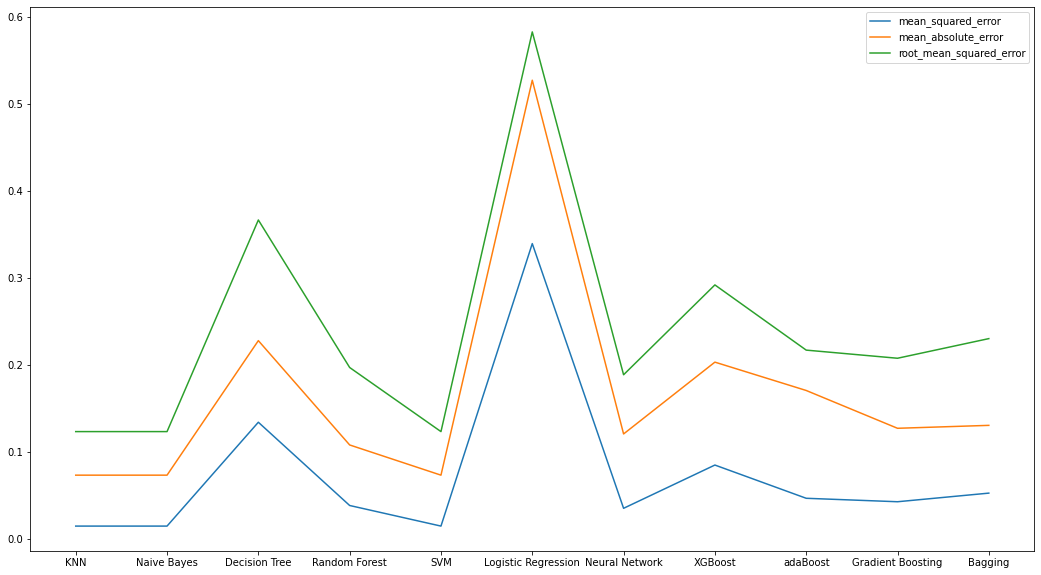

In [386]:
plt.figure(figsize=(18,10))
plt.plot(df['index'],df['Mean Squared Error'],label='mean_squared_error')
plt.plot(df['index'],df['Mean Absolute Error'],label='mean_absolute_error')
plt.plot(df['index'],df['Root Mean Squared Error'],label='root_mean_squared_error')
plt.legend()
plt.show()

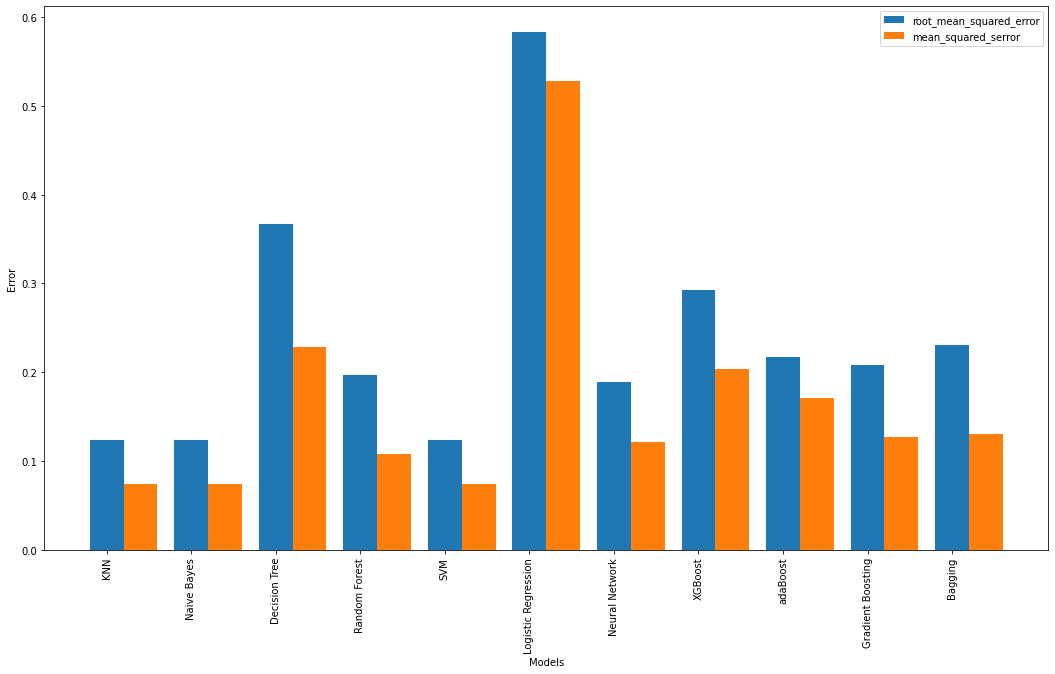

In [412]:
# Bar plot
plt.figure(figsize=(18,10))
N = len(df['index'])
ind = np.arange(N)
w = 0.4

plt.bar(df['index'],df['Root Mean Squared Error'],w,label='root_mean_squared_error')
plt.bar(ind+w,df['Mean Absolute Error'],w,label='mean_squared_serror')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('Error')
plt.legend()
plt.show()

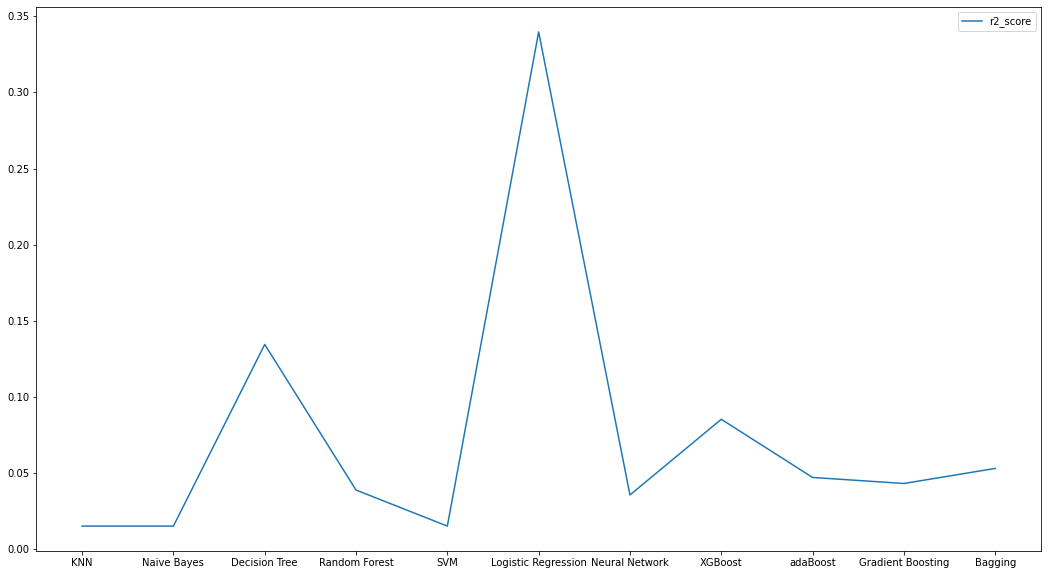